<a href="https://colab.research.google.com/github/brunavent/portfolio/blob/master/An%C3%A1lise_de_dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - `Paris`**

[Airbnb](https://www.airbnb.com.br/) é a sigla da expressão em inglês *airbed and breakfast*, cuja tradução em português, ao pé da letra, é “**colchão de ar e café da manhã”**. Também é o nome do site que atua como um espaço virtual em que as pessoas alugam a própria residência para desconhecidos – sem ser uma imobiliária.


Para algumas pessoas, pode soar estranho alugar a própria casa, sair para trabalhar, viajar e deixá-la com desconhecidos, mas os criadores do site *Airbnb*, baseados na experiência de terem alugado o próprio sofá da sala e partilharem o uso de sua cozinha, e com sucesso, investiram, sem muitas pretensões, em um mercado que acabou por crescer dia a dia e, depois de oito anos, o Airbnb, disponível também em aplicativo para smartphone, espalhou-por 190 países, cujos usuários passam de 60 milhões de pessoas.

Nesse projeto teremos dados tirados do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), disponibilizado pelo próprio Airbnb.

## **Aquisição dos Dados Necessários**

Nesse projeto teremos como base os dados diponibilizados pelo site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), sendo possível analisar dados de várias cidades ao redor do mundo.

O arquivo base dessa análise inicial será o `listings.csv` da cidade de Paris na França.

In [1]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importando o arquivo csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2021-07-06/visualisations/listings.csv")

## **Analisando os Dados**


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86957,2.36127,Entire home/apt,125,3,1,2019-01-02,0.03,1,364
1,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,64,1,250,2020-08-08,2.63,1,23
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,93,9,273,2020-02-26,2.26,2,209
3,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.07,1,352
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,358


Na célula acima verificamos as 5 primeiras entradas do nosso *dataset*.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nessa etapa iremos identificar quantas entradas nosso conjunto possui e ver os tipos de cada uma.

In [4]:
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))

# analisando as 5 peimrias entradas do dataset
display(df.dtypes)

Entradas:	51040
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**




In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.243358
last_review                       0.243358
host_name                         0.001587
name                              0.000960
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Pontos importantes que podemos observar na célula acima:

* `neighbourhood_group` tem **TODOS**, 100%,  os seus valores em falta.
* `reviews_per_month` e `last_review` têm aproximadamente, 30% dos seus valores em falta.
* `host_name` e `name` têm 0,1% dos seus valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 


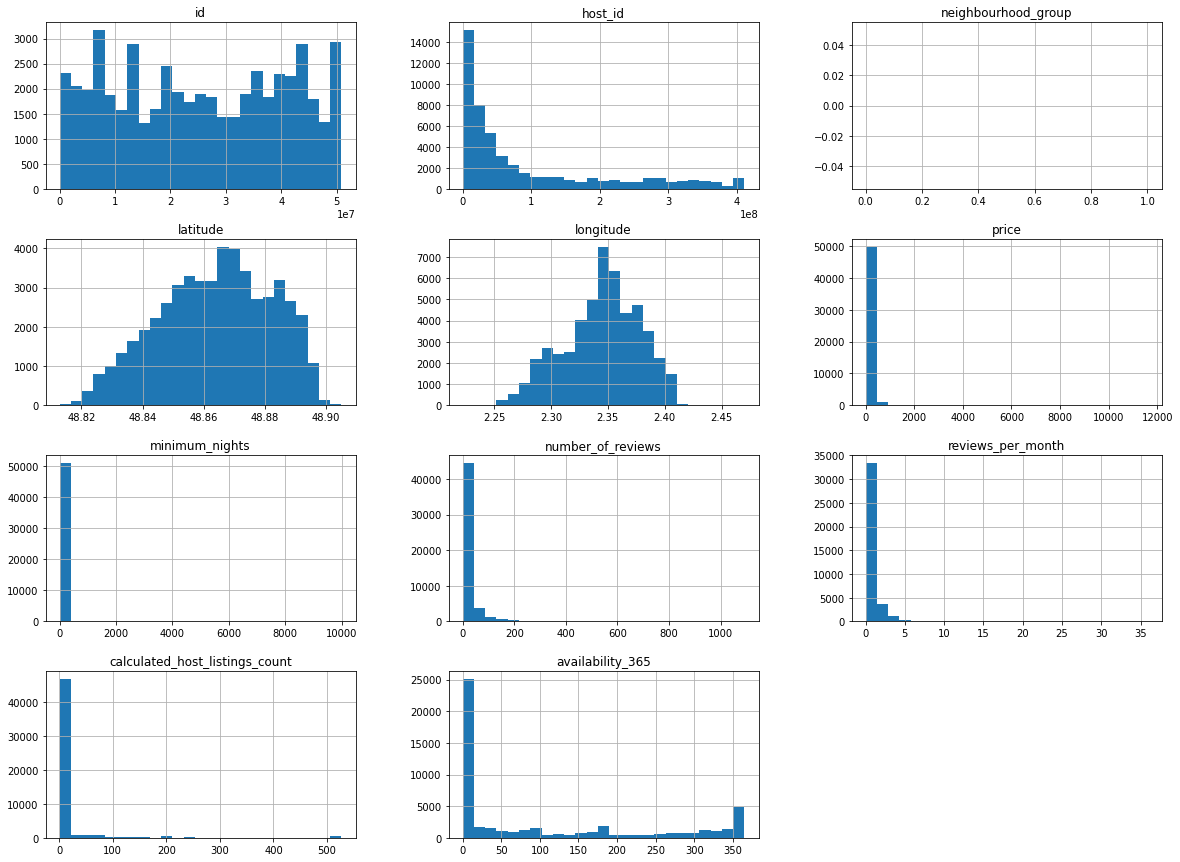

In [6]:
df.hist(bins=25, figsize=(20,15));

### **Q4. Há *outliers* presentes?**


O que são ***outliers***?

Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos **fora da curva**. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos nas análises.

Com base na definição acima podemos ver alguns outliers nos histogramas acima, como em `price`, `minium_nights` e `calculated_ host_ listings_ count`.

Na próxima célula faremos um resumo estatístico para conseguirmos observar com clareza as variáveis que pelo histograma observamos a presença de *outliers*.

In [7]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,51040.000000,51040.000000,51040.000000,38619.000000,51040.000000,51040.000000
mean,124.526607,111.238656,20.262441,0.711934,14.815831,105.081172
std,246.523539,169.569734,43.403127,1.058283,61.755875,134.751091
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,85.000000,4.000000,5.000000,0.360000,1.000000,18.000000
75%,130.000000,365.000000,20.000000,0.900000,2.000000,200.000000
max,11600.000000,9999.000000,1093.000000,35.880000,527.000000,365.000000


##Boxplot

Nas próximas células faremos o boxplot para `price` e `minium_nights`.

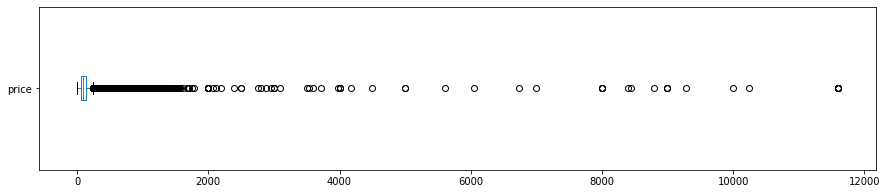

In [8]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

In [9]:
# ver de fato a quantidade de valores que estão sendo considerados outliers, acima de 1500
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


price: valores acima de 1500
72 entradas
0.1411%


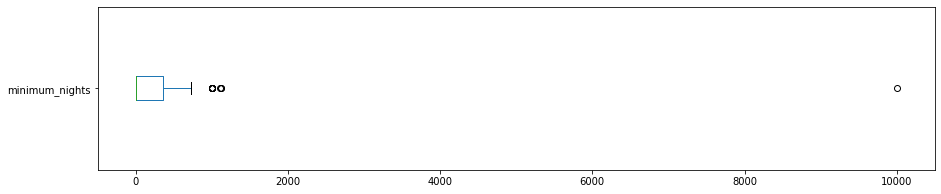

In [10]:
# minium_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [11]:
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30:
15576 entradas
30.5172%


## Histogramas sem *outliers* 

Iremos limpar o *DataFrame* das variáveis `price`e `minimum_nights`.
* Removeremos os *outliers* de um novo DataFrame.
* Removeremos a coluna `neighbourhood_group` visto que está vazia.
* Plotaremos o histograma com essas mudanças.

In [23]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


In [24]:
df_clean.drop('neighbourhood_group', axis=1, inplace=True)


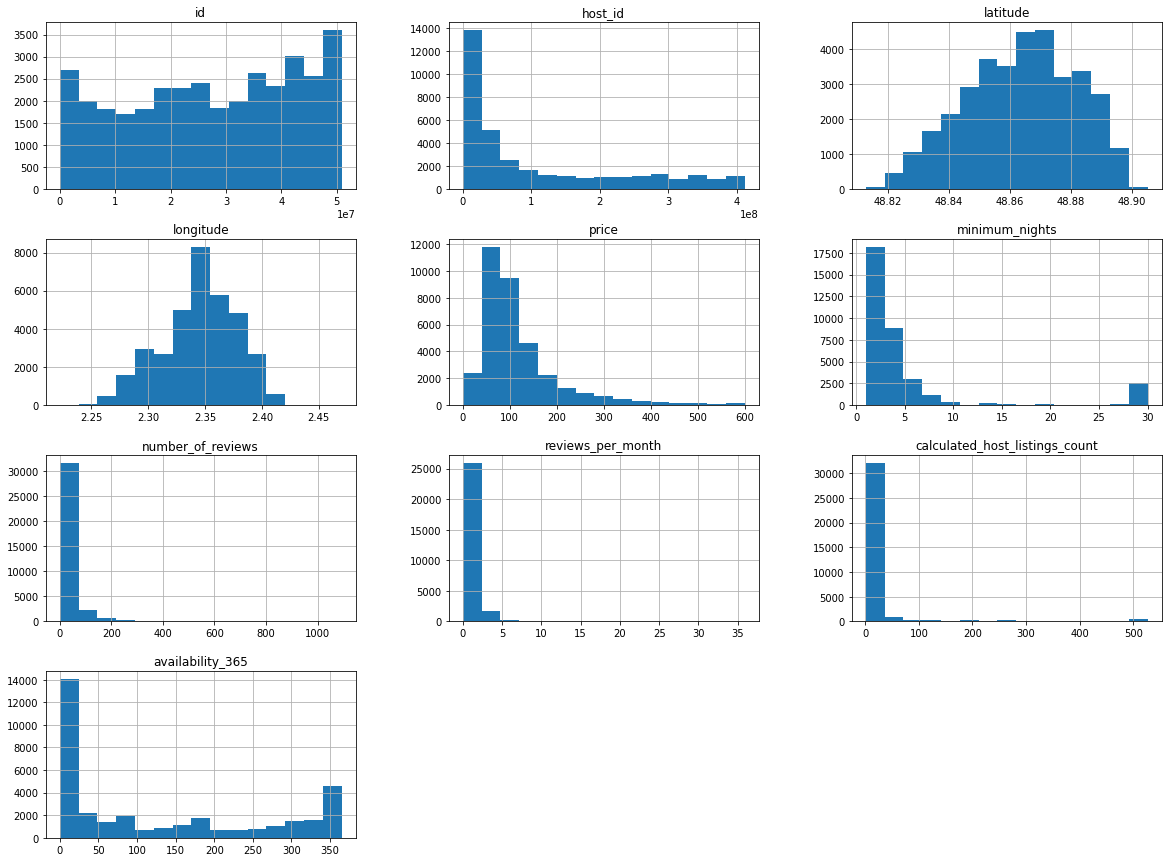

In [25]:
df_clean.hist(bins=15, figsize=(20,15));

### **Q4. Qual a correlação existente entre as variáveis**

O objetivo do estudo de correlação entre variáveis é determinar o *grau de relacionamento* entre elas. 

Iremos fazer isso criando uma matriz de correlação. Mas por que faremos isso? A **matriz de correlação** permite que a **correlação** de todos os pares de variáveis possa ser observada em uma tabela. Isso pode ser feito de maneira muito simples nas principais ferramentas de análise de dados de hoje.


In [15]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.054892,-0.033842,-0.004953,0.114313,0.213728
minimum_nights,-0.054892,1.000000,-0.067497,-0.112931,0.045591,0.104054
number_of_reviews,-0.033842,-0.067497,1.000000,0.681672,-0.053068,0.140749
reviews_per_month,-0.004953,-0.112931,0.681672,1.000000,-0.003909,0.197694
calculated_host_listings_count,0.114313,0.045591,-0.053068,-0.003909,1.000000,0.068806
availability_365,0.213728,0.104054,0.140749,0.197694,0.068806,1.000000


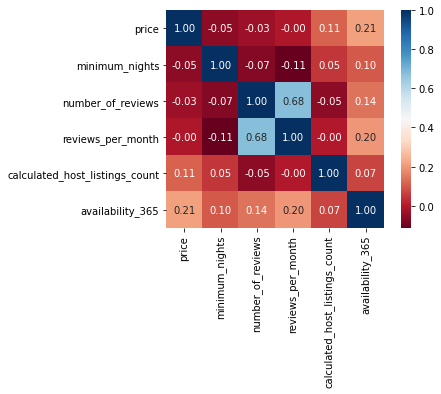

In [16]:
# plotaremos um mapa de calor dessa matriz
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**



O Airbnb tem muitas possibilidades de imóvel. Desde *quartos* até *acomodações únicas*. Na próxima célula iremos saber qual imóvel é mais procurado na cidade de Paris na França.

In [17]:
df_clean.room_type.value_counts()

Entire home/apt    26651
Private room        7269
Hotel room          1139
Shared room          356
Name: room_type, dtype: int64

`Entire home/apt ` (casa ou apartamento inteiro) é o tipo de imóvel mais alugado como podemos observar.




In [18]:
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.752534
Private room       0.205252
Hotel room         0.032162
Shared room        0.010052
Name: room_type, dtype: float64

Porcentagem da disponibilidade de cada imóvel na cidade de *Paris*.

### **Q6. Qual a localidade mais cara de Paris?**

* `groupby()`: nela podemos manipular grandes conjuntos de dados utilizando o método groupby(). 
Para averiguarmos o local mais caro teremos que comparar os bairros e seus valores de locação.

In [19]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            231.627281
Palais-Bourbon    191.893832
Louvre            185.768805
Luxembourg        178.161369
Passy             172.217468
Hôtel-de-Ville    169.783414
Bourse            164.092669
Temple            159.086147
Opéra             139.518813
Panthéon          138.068308
Name: price, dtype: float64

### **Conclusão**

Nesse modelo foi feita uma análise simples de alguns pontos tidos como importantes no 1º módulo de **DSNP**.

A presença de *outliers* foi visível nas variáveis `price` e `minimum_nights` e ficou ainda mais claro quando plotado pro histograma. Os valores não seguiam uma distribuição homogênea e isso fazia com que o gráfico ficasse distorcido na representação gráfica.

Após a identificação desses *outliers* foi feita uma limpeza no *DataFrame* e após isso a representação gráfica ficou mais clara para análise. 